# 환경 설정

In [1]:
!pip install pycaret

  Using cached pycaret-2.2.3-py3-none-any.whl (249 kB)
  Using cached scikit_learn-0.23.2-cp38-cp38-win_amd64.whl (6.8 MB)
  Using cached spacy-2.3.5-cp38-cp38-win_amd64.whl (9.7 MB)
  Using cached pandas_profiling-2.10.0-py2.py3-none-any.whl (239 kB)
  Using cached kmodes-0.10.2-py2.py3-none-any.whl (18 kB)
  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)
  Using cached plotly-4.14.3-py2.py3-none-any.whl (13.2 MB)
Processing c:\users\kcg\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866\cufflinks-0.17.3-py3-none-any.whl
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
Processing c:\users\kcg\appdata\local\pip\cache\wheels\94\9b\33\a245c7f9156010196e279d3bac735a47e65f1effb4157df186\pyod-0.8.6-py3-none-any.whl
  Using cached lightgbm-3.1.1-py2.py3-none-win_amd64.whl (754 kB)
  Using cached mlxtend-0.18.0-py2.py3-none-any.whl (1.3 MB)
Processing c:\users\kcg\appdata\local\pip\cache\wheels\31\8c\a0\24a443892f2134e691d59c8c6c35e

ERROR: pandas-profiling 2.10.0 has requirement tqdm>=4.48.2, but you'll have tqdm 4.47.0 which is incompatible.
ERROR: pynndescent 0.5.1 has requirement numba>=0.51.2, but you'll have numba 0.50.1 which is incompatible.


In [2]:
!pip install missingno

In [3]:
import pycaret
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
import missingno as msno
import os
import pandas as pd
import numpy as np
import seaborn as sns

plt.rcParams["font.family"]="Malgun Gothic"
plt.rcParams["font.size"]=12
plt.rcParams["figure.figsize"]=(14,4)
mpl.rcParams["axes.unicode_minus"]=False

import time
import statsmodels.api as sm

In [4]:
import os

if os.name=='nt':
    plt.rc('font',family='Malgun Gothic')

In [5]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

In [6]:
df=pd.read_csv('datafile.csv',encoding='ANSI')

In [7]:
# df.hist(bins=50,figsize=(20,30))
# plt.show()

# 변수 스케일링

In [8]:
colnames=['정비대금',
       '불가동일수', 'VIP', '계기비행(교육)', '계기비행(야간)', '수색(주간)', '시험비행', '주간비행',
       '해상경비', '계기비행(주간)', '구명벌투하', '구조(주간)', '기타', '불법조업단속', '비상절차(훈련)',
       '수색(야간)', '야간비행', '야간비행(교육)', '오염군탐색', '오염적발', '정비(행정이동)', '조명탄투하',
       '타기관지원', '합동훈련', '해상안전']

In [9]:
df_cat=df.iloc[:,:10]
df_fl=df.iloc[:,10:]

## Standard Scaler

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

new_colnames=[i+'_ss' for i in colnames]
df_ss=pd.concat([df_cat,pd.DataFrame(scaler.fit_transform(df_fl[colnames]),columns=new_colnames)],axis=1)

# AutoML

In [ ]:
from sklearn.model_selection import train_test_split
from pycaret.regression import *

In [129]:
train,test=train_test_split(df_ss,test_size=0.2,random_state=42)
exp1=setup(train,target='정비대금_ss',train_size=0.8)

,Description,Value
0,session_id,1276
1,Target,정비대금_ss
2,Original Data,"(48, 35)"
3,Missing Values,False
4,Numeric Features,17
5,Categorical Features,17
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(38, 62)"


In [130]:
best_5=compare_models(sort='R2',n_select=1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,0.6237,1.5168,0.9324,-79.9054,0.3477,0.9773,0.0140
ada,AdaBoost Regressor,0.7270,1.6765,0.9563,-112.2943,0.4007,1.0944,0.0530
et,Extra Trees Regressor,0.7617,1.7943,1.0222,-164.5695,0.3302,1.0854,0.1080
llar,Lasso Least Angle Regression,0.8285,1.5764,1.0184,-334.1124,0.4058,1.3544,0.0120
lightgbm,Light Gradient Boosting Machine,0.8285,1.5764,1.0184,-334.1124,0.4058,1.3544,0.0230
lasso,Lasso Regression,0.8285,1.5764,1.0184,-334.1124,0.4058,1.3544,0.0110
en,Elastic Net,0.8296,1.5789,1.0202,-344.6019,0.4068,1.3611,0.0110
br,Bayesian Ridge,0.8164,1.5904,1.0231,-348.8406,0.3862,1.3359,0.0120
catboost,CatBoost Regressor,0.8058,1.6596,1.0315,-370.9177,0.3997,1.4025,3.9890
rf,Random Forest Regressor,0.8457,1.7480,1.0747,-556.9951,0.4129,1.6984,0.1320


In [127]:
knn=create_model('knn',cross_validation=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4937,0.5467,0.7394,-0.361,0.2494,1.2763


In [128]:
rf=create_model('rf',cross_validation=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.735,0.8553,0.9248,-1.1294,0.2807,1.4143


In [37]:
et=create_model('et',cross_validation=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6583,0.5548,0.7449,-0.9951,0.224,1.8528


In [38]:
dt=create_model('dt',cross_validation=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.6969,3.479,1.8652,-11.5106,0.5972,5.4578


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4699,0.4259,0.6526,0.1303,0.2448,0.9014


In [39]:
knn=create_model('knn',cross_validation=False) #KNN

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2411,0.0694,0.2633,0.7506,0.1797,1.1402


In [40]:
rf=create_model('rf',cross_validation=False) #RF

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4806,0.2655,0.5153,0.0452,0.2723,2.2735


In [41]:
gbr=create_model('gbr',cross_validation=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.8465,0.9139,0.956,-2.2865,0.2832,2.8709


In [105]:
catboost=create_model('catboost',cross_validation=False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4564,0.3017,0.5493,-0.0849,0.3331,1.5244


In [110]:
blender_specific1 = blend_models(estimator_list = [knn,catboost], optimize = 'R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6825,0.5274,0.7263,-2.6261,0.3280,2.5692
1,0.3054,0.0943,0.3071,-7.7252,0.2175,0.9365
2,1.0327,1.7449,1.3210,-0.1519,0.5916,1.1205
3,1.3989,4.7046,2.1690,-0.3553,0.6897,1.2553
4,1.0456,1.1344,1.0651,-0.2981,0.3002,1.6496
5,0.2727,0.0822,0.2867,-0.0385,0.2189,0.9364
6,0.8000,0.7091,0.8421,-0.9579,0.3555,2.6181
7,1.4474,6.2106,2.4921,-0.1929,0.8588,0.7853
8,0.5186,0.4240,0.6512,-1.3913,0.2251,1.5157
9,0.2206,0.0489,0.2211,-32.5290,0.1642,0.4771


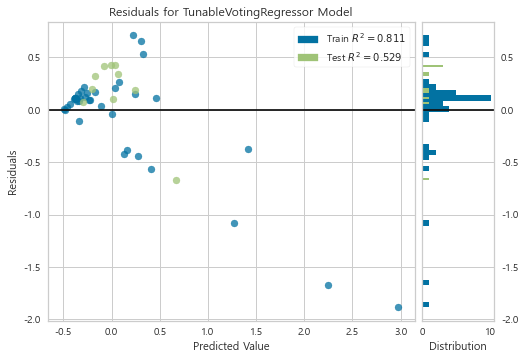

In [111]:
plot_model(blender_specific1 )

In [ ]:
0.820 0.430

# RMSE와 R2가 가장 유요한 두 개만 Blend

In [103]:
blender_specific = blend_models(estimator_list = [rf,knn], optimize = 'R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5134,0.2882,0.5369,-0.9817,0.2476,2.1407
1,0.3390,0.1257,0.3545,-10.6242,0.2124,1.0426
2,1.1685,1.8701,1.3675,-0.2346,0.5575,1.4678
3,1.4013,4.6957,2.1670,-0.3527,0.6925,1.2706
4,0.9753,0.9810,0.9904,-0.1224,0.2704,1.5579
5,0.2635,0.0872,0.2953,-0.1018,0.2092,0.8107
6,0.7980,0.6798,0.8245,-0.8768,0.3600,2.5209
7,1.3818,6.0573,2.4612,-0.1634,0.8714,0.6426
8,0.4480,0.3625,0.6021,-1.0444,0.1402,1.1996
9,0.2545,0.0660,0.2568,-44.2597,0.1933,0.5485


# Blender_Specific

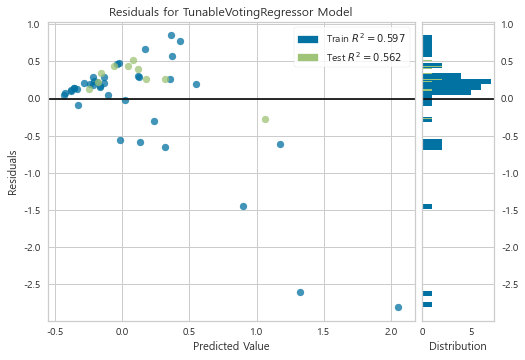

In [104]:
plot_model(blender_specific)

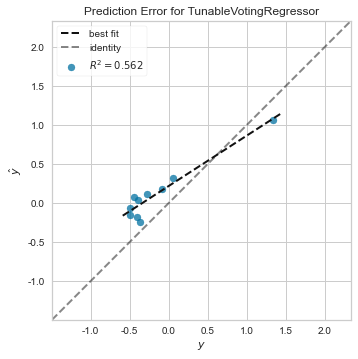

In [71]:
plot_model(blender_specific, plot='error')

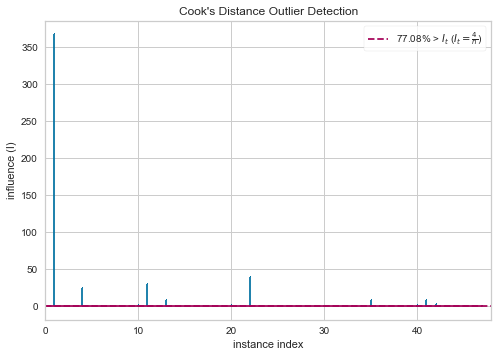

In [72]:
plot_model(blender_specific, plot='cooks')

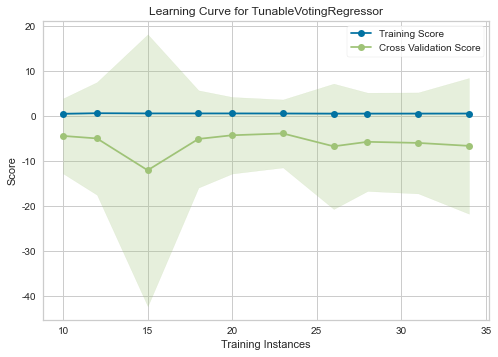

In [73]:
plot_model(blender_specific, plot='learning')

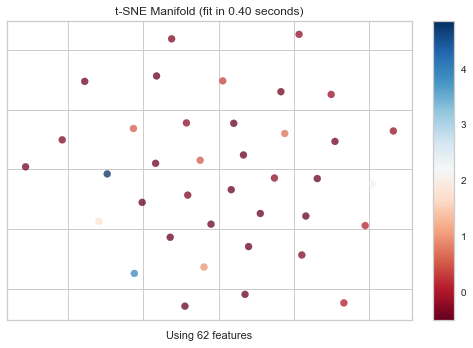

In [75]:
plot_model(blender_specific, plot = 'manifold')

In [77]:
plot_model(blender_specific, plot='parameter')

,Parameters
estimators,"[('rf', RandomForestRegressor(bootstrap=True, ..."
n_jobs,-1
verbose,False
weights,"[1, 1]"
weight_0,1
weight_1,1


# RF

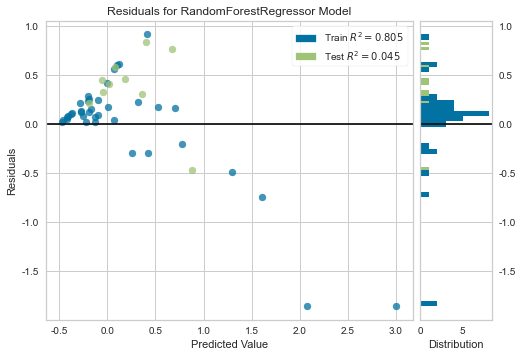

In [60]:
plot_model(rf)
# y값이 극단적으로 높은 것들을 제외하면 예측력이 높은 편

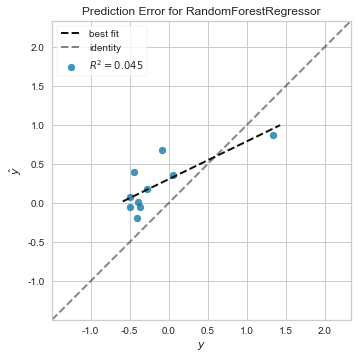

In [61]:
plot_model(rf, plot='error')

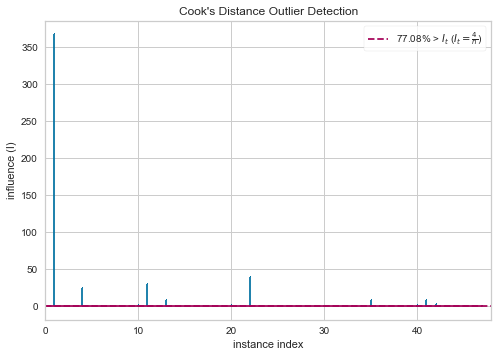

In [62]:
plot_model(rf, plot='cooks')

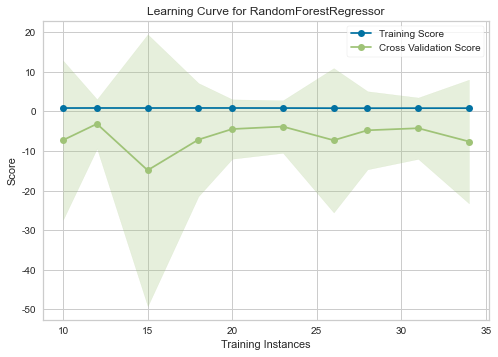

In [63]:
plot_model(rf, plot='learning')

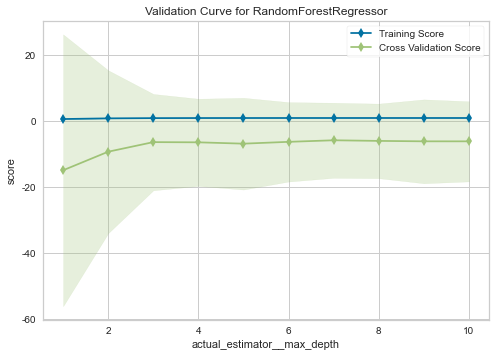

In [64]:
plot_model(rf, plot='vc')

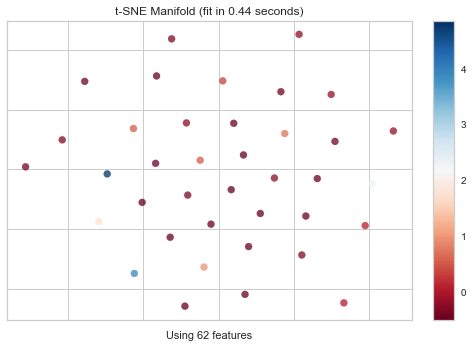

In [65]:
plot_model(rf, plot = 'manifold')

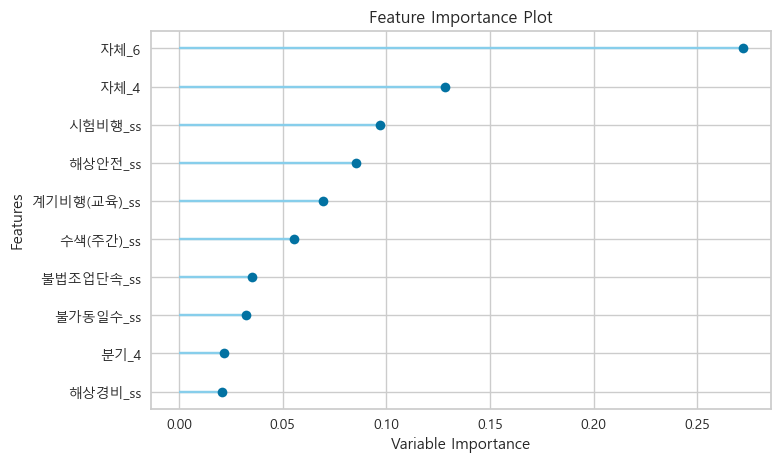

In [81]:
plot_model(rf, plot='feature')

In [67]:
plot_model(rf, plot='parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
criterion,mse
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None
min_samples_leaf,1


# KNN

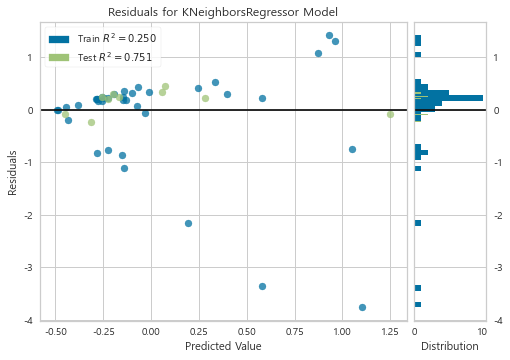

In [83]:
plot_model(knn)

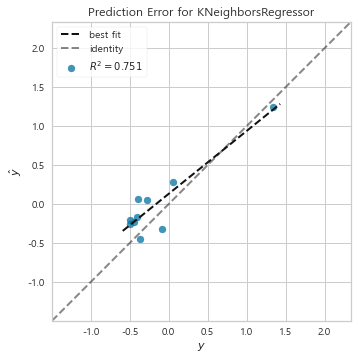

In [84]:
plot_model(knn, plot='error')

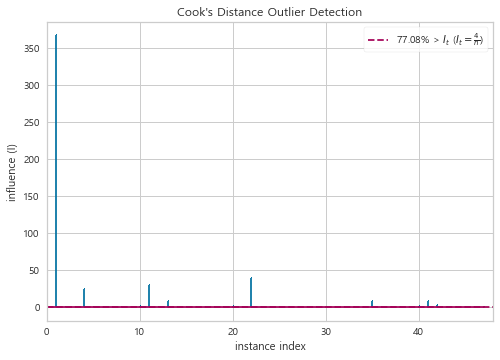

In [85]:
plot_model(knn, plot='cooks')

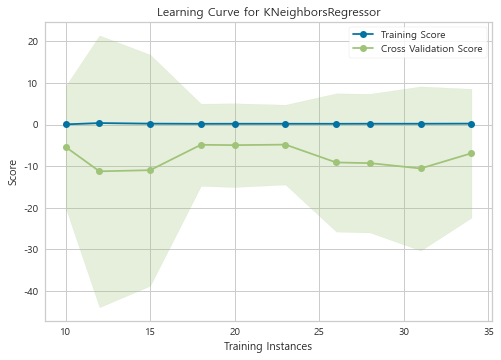

In [86]:
plot_model(knn, plot='learning')

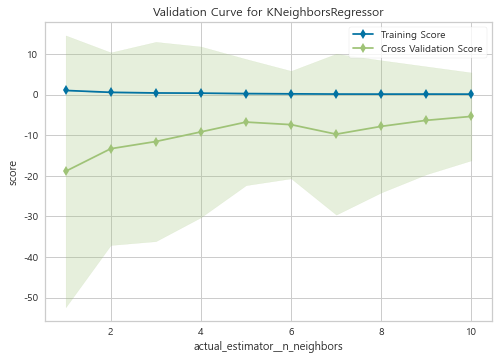

In [87]:
plot_model(knn, plot='vc')

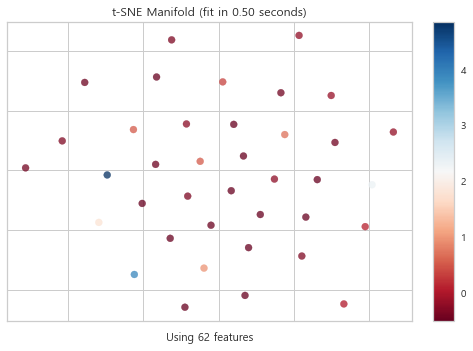

In [88]:
plot_model(knn, plot = 'manifold')

In [90]:
plot_model(knn, plot='parameter')

,Parameters
algorithm,auto
leaf_size,30
metric,minkowski
metric_params,None
n_jobs,-1
n_neighbors,5
p,2
weights,uniform
